In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Importación y recolección de datos

In [21]:
# Importación de datos
data = np.loadtxt('Averages.txt')

# Recolección de datos. Almacenamos los datos de masa, área y sus incertidumbres en vectores
M = data[:,0]   #masa
A = data[:,1]   #área
dM = data[:,2]  #incertidumbres de las masas
dA = data[:,3]  #incertidumbres de las áreas

## Ajuste de una función

In [22]:
"""
Se define la función que se desea ajustar. La entrada corresponde a la variable o variables independientes (x)
y a los parametros de ajuste.
"""

def func(x, a, b):
    return a*x+b

"""
Se realiza el ajuste del conjunto de datos. Las entradas son: la función de ajuste, los datos de la variable independiente 
(xdata), los datos de la variable dependiente (ydata), los errores de ydata, y absolute_sigma=True para tomar a los errores
de ydata como desviaciones estándar.   
"""

param, cov = curve_fit(func, A, M, sigma=dM, absolute_sigma=True)
print(param)                   #Parametros de ajuste
print(np.sqrt(np.diag(cov)))   #Diagonal de la matriz de covarianza --> Errores en desviación estándar de los parametros

[ 0.45573497 -0.0412141 ]
[0.00038692 0.00305648]


In [23]:
#Coeficiente de correlación de pearson

print(np.corrcoef(A,M))        
R = np.diag(np.corrcoef(A,M),-1)

[[1.         0.99964189]
 [0.99964189 1.        ]]


## Graficas

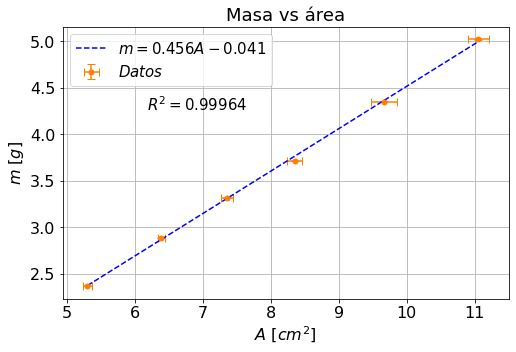

In [25]:
#Creamos una figura de tamaño 8x5
plt.figure(figsize=(8, 5)) 

#Graficamos las barras de error junto con los marcadores de los datos
(_, caps, _) = plt.errorbar(A, M, xerr= dA, yerr= dM, fmt='o', color='#FF8000', markersize=5, capsize=4, ecolor = '#FF8000', label='$Datos$')

#Graficamos la función de ajuste
plt.plot(A, func(A, *param), color ='blue', linestyle='--', label='$m = %.3fA %.3f$'%(param[0],param[1]))
plt.legend() #mostrar leyendes de los datos y ajuste

#Ponemos una anotación en la gráfica. Se puede cambiar su pocisión con el patametro xy.
plt.annotate('$R^2 = %.5f$'%R[0], xy=(6.1, 4.2),  xycoords='data', xytext=(+5, +5), textcoords='offset points', 
             color= 'black',fontsize=15)

#---------------------------------------------------
##Definimos titulos, tamaño de fuente y de etiquetas
#---------------------------------------------------

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Masa vs área', fontsize = 18)
plt.legend(fontsize = 15, loc='upper left')

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$m $ [$g$]', fontsize = 16)
plt.xlabel('$A $ [$cm^2$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 16)
plt.yticks(size = 16)

plt.grid(True) #mostramos la rejilla de fondo
plt.savefig('Figura_ajuste_lineal.png', format='png') #Se guarda la figura en el computador
plt.show() #mostramos todo lo que graficamos

